In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install openpyxl

In [4]:
data = pd.read_excel('Cleaned_Validation_Dataset.xlsx')

In [5]:
data.head()

,Date,Temp_0.3m_C,Temp_0.6m_C,Temp_0.91m_C,Temp_1.21m_C,Rainfall_mm,Air_Temp_F,Air_Temp_C
0,2019-05-01,8.429167,8.237500,8.000000,7.600000,1.778,48.8,9.333
1,2019-05-02,8.950000,8.358333,8.012500,7.600000,4.826,53.7,12.056
2,2019-05-03,10.187500,8.950000,8.220833,7.654167,3.810,55.6,13.111
3,2019-05-04,11.241667,9.670833,8.620833,7.783333,8.128,53.3,11.833
4,2019-05-05,12.025000,10.337500,9.091667,7.979167,0.000,52.3,11.278


In [7]:
data.shape

(1096, 8)

In [8]:
data.isna().sum()

Date             0
Temp_0.3m_C     76
Temp_0.6m_C      0
Temp_0.91m_C     0
Temp_1.21m_C     0
Rainfall_mm      0
Air_Temp_F       0
Air_Temp_C       0
dtype: int64

In [9]:
data['Rainfall (inch)'] = data['Rainfall_mm'] * 0.0393701
data['BH1_0.9m_Temp_C'] = data['Temp_0.91m_C']
data['BH1_0.6m_Temp_C'] = data['Temp_0.6m_C']
data['BH1_0.3m_Temp_C'] = data['Temp_0.3m_C']
data['BH1_1.21m_Temp_C'] = data['Temp_1.21m_C']

In [10]:
data.isna().sum()

Date                 0
Temp_0.3m_C         76
Temp_0.6m_C          0
Temp_0.91m_C         0
Temp_1.21m_C         0
Rainfall_mm          0
Air_Temp_F           0
Air_Temp_C           0
Rainfall (inch)      0
BH1_0.9m_Temp_C      0
BH1_0.6m_Temp_C      0
BH1_0.3m_Temp_C     76
BH1_1.21m_Temp_C     0
dtype: int64

In [12]:
data.shape

(1020, 13)

In [11]:
data = data.dropna()

In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_year'] = data['Date'].dt.dayofyear

In [14]:
data.describe()

,Date,Temp_0.3m_C,Temp_0.6m_C,Temp_0.91m_C,Temp_1.21m_C,Rainfall_mm,Air_Temp_F,Air_Temp_C,Rainfall (inch),BH1_0.9m_Temp_C,BH1_0.6m_Temp_C,BH1_0.3m_Temp_C,BH1_1.21m_Temp_C,day_of_year
count,1020,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,2020-11-29 19:03:31.764705792,9.989042,10.068921,10.094739,10.141173,3.148853,47.258922,8.477162,0.123971,10.094739,10.068921,9.989042,10.141173,178.299020
min,2019-05-01 00:00:00,0.300000,1.000000,1.450000,2.116667,0.000000,-3.900000,-19.944000,0.000000,1.450000,1.000000,0.300000,2.116667,1.000000
25%,2020-03-26 18:00:00,2.021875,3.036458,3.561458,4.500000,0.000000,33.275000,0.708250,0.000000,3.561458,3.036458,2.021875,4.500000,85.750000
50%,2020-12-06 12:00:00,8.283333,8.400000,8.591667,8.922917,0.000000,46.400000,8.000000,0.000000,8.591667,8.400000,8.283333,8.922917,170.500000
75%,2021-08-18 06:00:00,17.965625,17.179167,16.201042,15.678125,2.540000,63.725000,17.625000,0.100000,16.201042,17.179167,17.965625,15.678125,278.000000
max,2022-04-30 00:00:00,24.391667,22.933333,21.800000,20.100000,69.342000,83.100000,28.389000,2.730001,21.800000,22.933333,24.391667,20.100000,366.000000
std,NaN,7.933651,7.302904,6.746957,5.875904,7.331768,18.513144,10.285079,0.288652,6.746957,7.302904,7.933651,5.875904,107.633131


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1095
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1020 non-null   datetime64[ns]
 1   Temp_0.3m_C       1020 non-null   float64       
 2   Temp_0.6m_C       1020 non-null   float64       
 3   Temp_0.91m_C      1020 non-null   float64       
 4   Temp_1.21m_C      1020 non-null   float64       
 5   Rainfall_mm       1020 non-null   float64       
 6   Air_Temp_F        1020 non-null   float64       
 7   Air_Temp_C        1020 non-null   float64       
 8   Rainfall (inch)   1020 non-null   float64       
 9   BH1_0.9m_Temp_C   1020 non-null   float64       
 10  BH1_0.6m_Temp_C   1020 non-null   float64       
 11  BH1_0.3m_Temp_C   1020 non-null   float64       
 12  BH1_1.21m_Temp_C  1020 non-null   float64       
 13  day_of_year       1020 non-null   int32         
dtypes: datetime64[ns](1), float64

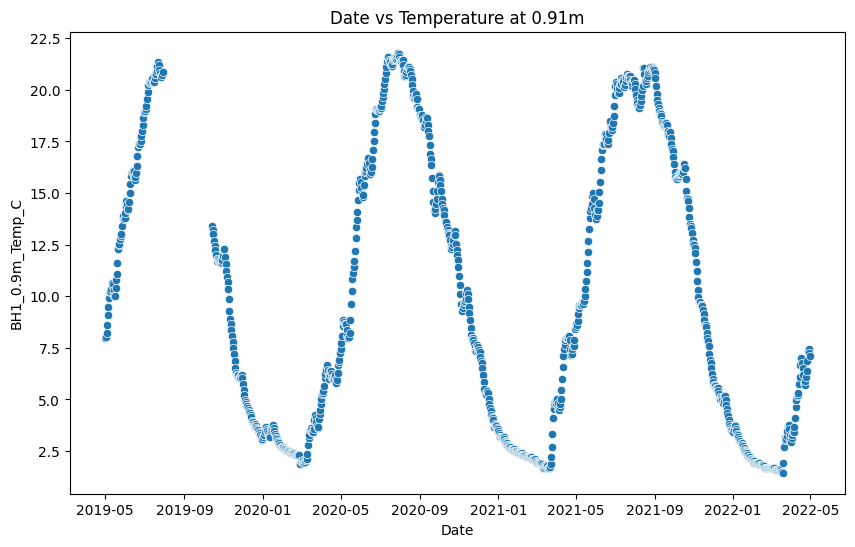

In [16]:
# Visualize the relationship between Air Temp and Temperatures at different depths
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Date'], y=data['BH1_0.9m_Temp_C'],palette='rocket')
plt.title('Date vs Temperature at 0.91m')
plt.show()

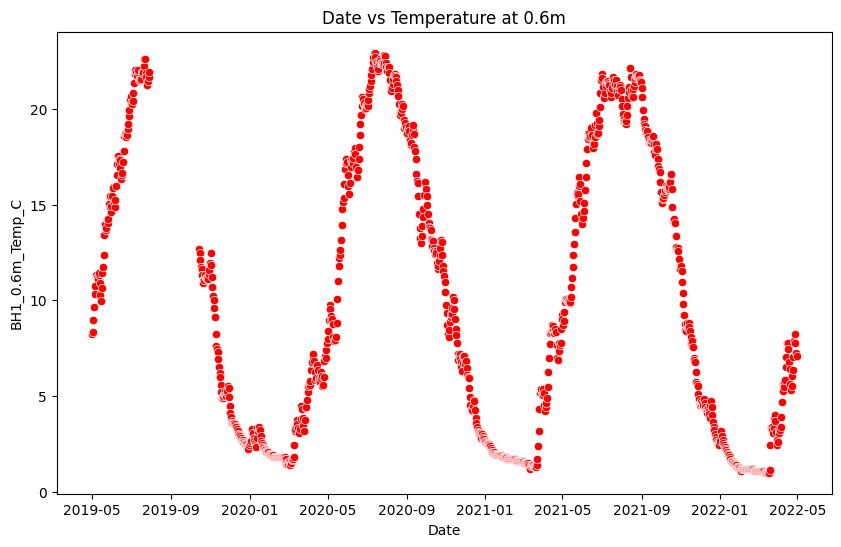

In [17]:
# Visualize the relationship between Air Temp and Temperatures at different depths
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Date'], y=data['BH1_0.6m_Temp_C'],color='r')
plt.title('Date vs Temperature at 0.6m')
plt.show()

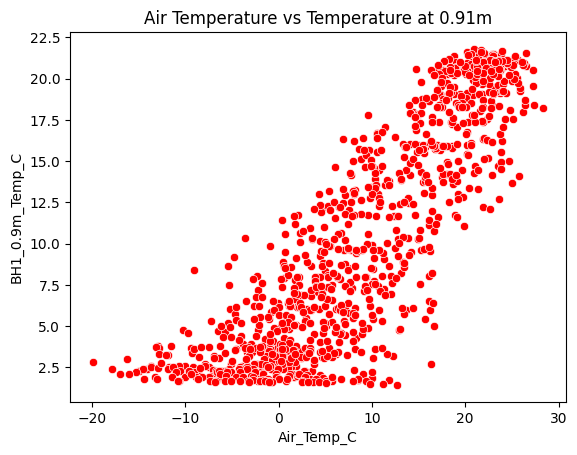

In [18]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air_Temp_C'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Air Temperature vs Temperature at 0.91m')
plt.show()

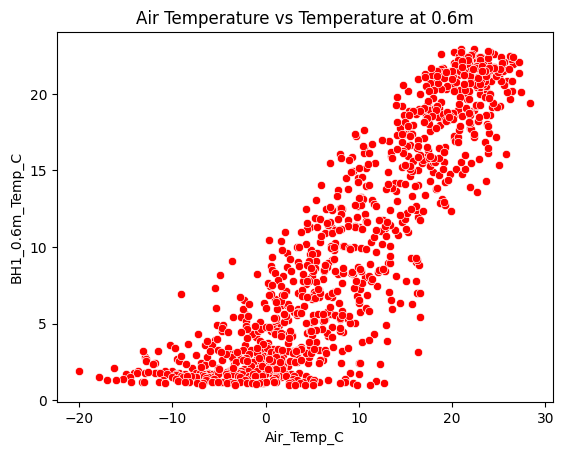

In [19]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Air_Temp_C'], y=data['BH1_0.6m_Temp_C'],color='r')
plt.title('Air Temperature vs Temperature at 0.6m')
plt.show()

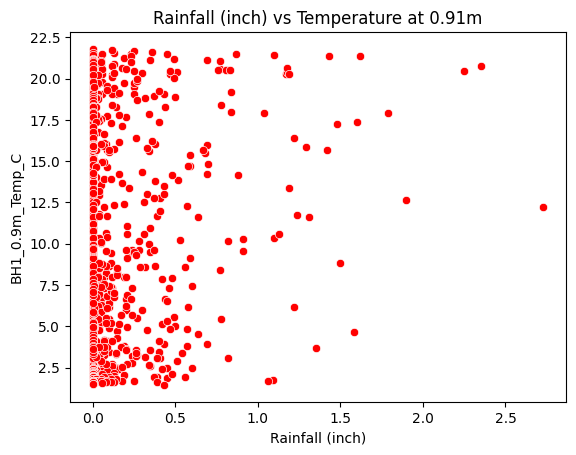

In [20]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall (inch)'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Rainfall (inch) vs Temperature at 0.91m')
plt.show()

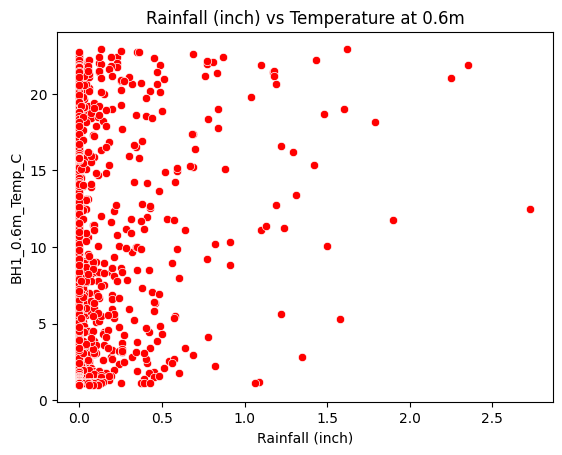

In [21]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['Rainfall (inch)'], y=data['BH1_0.6m_Temp_C'],color='r')
plt.title('Rainfall (inch) vs Temperature at 0.6m')
plt.show()

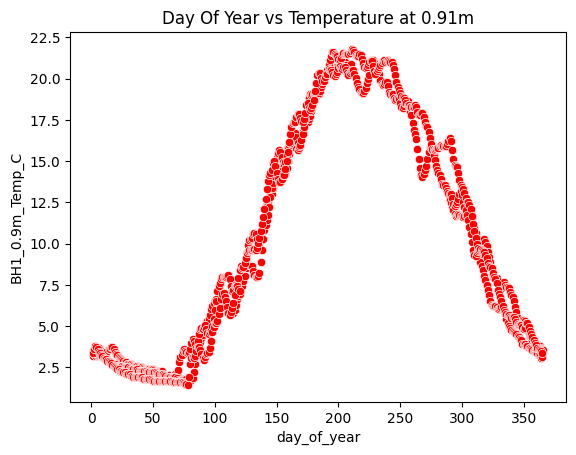

In [22]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['BH1_0.9m_Temp_C'],color='r')
plt.title('Day Of Year vs Temperature at 0.91m')
plt.show()

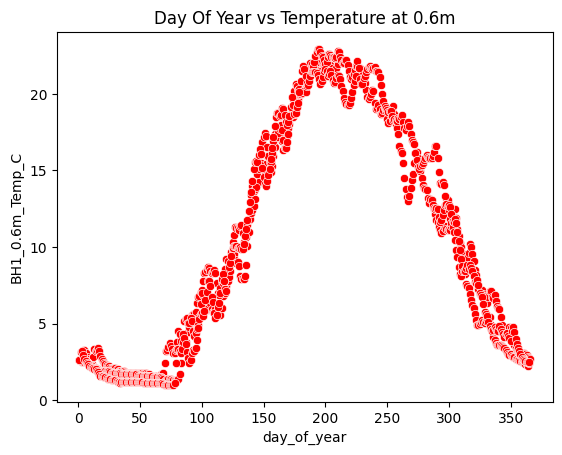

In [23]:
# Visualize the relationship between Air Temp and Temperatures at different depths
sns.scatterplot(x=data['day_of_year'], y=data['BH1_0.6m_Temp_C'],color='r')
plt.title('Day Of Year vs Temperature at 0.6m')
plt.show()

<Axes: >

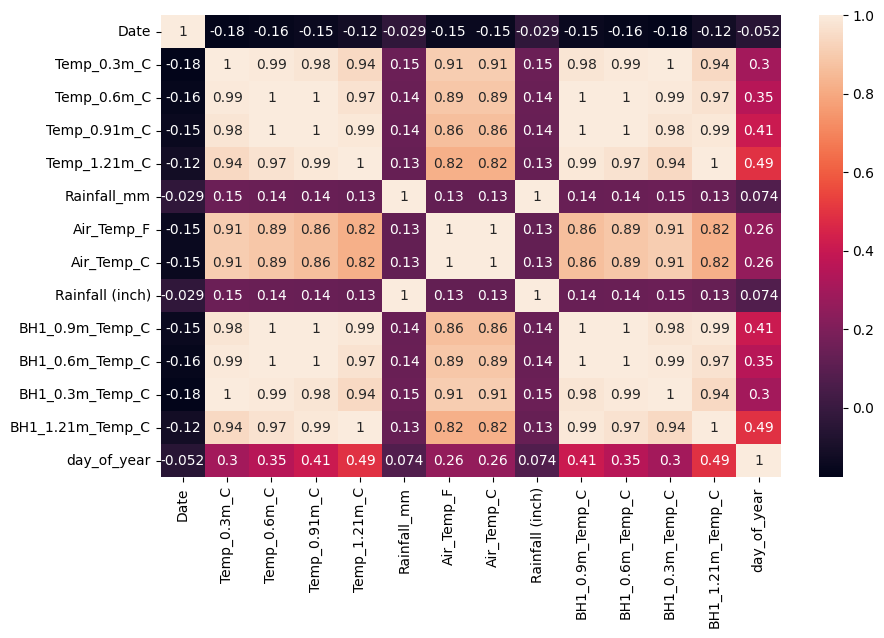

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [25]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

In [26]:
cols=['Rainfall (inch)','BH1_0.9m_Temp_C','BH1_0.6m_Temp_C','Air_Temp_C','day_of_year','BH1_1.21m_Temp_C', 'BH1_0.3m_Temp_C']
data = remove_outliers(data, cols)

In [27]:
data.shape

(868, 14)

In [28]:
X = data[['Air_Temp_C', 'Rainfall (inch)', 'day_of_year']]
y = data[['BH1_0.9m_Temp_C', 'BH1_0.6m_Temp_C', 'BH1_0.3m_Temp_C', 'BH1_1.21m_Temp_C']]

In [29]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,9.333,0.07,121
1,12.056,0.19,122
2,13.111,0.15,123
4,11.278,0.00,125
5,14.222,0.23,126


In [30]:
y.head()

,BH1_0.9m_Temp_C,BH1_0.6m_Temp_C,BH1_0.3m_Temp_C,BH1_1.21m_Temp_C
0,8.000000,8.237500,8.429167,7.600000
1,8.012500,8.358333,8.950000,7.600000
2,8.220833,8.950000,10.187500,7.654167
4,9.091667,10.337500,12.025000,7.979167
5,9.500000,10.775000,12.395833,8.204167


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
X.shape,X_train.shape,X_test.shape

((868, 3), (651, 3), (217, 3))

In [33]:
#Starndardization (Scaling the data)

# from sklearn.preprocessing import StandardScaler
scaler_x = MinMaxScaler()
scaler_y=MinMaxScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)
# y_train = scaler_y.fit_transform(y_train)
# y_test = scaler_y.transform(y_test)

In [34]:
X_train

array([[0.22413258, 0.        , 0.0467033 ],
       [0.64481824, 0.        , 0.8543956 ],
       [0.380444  , 0.        , 0.02747253],
       ...,
       [0.55516935, 0.        , 0.30769231],
       [0.51608632, 0.        , 0.95054945],
       [0.53907268, 0.        , 0.90384615]])

In [35]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np

In [36]:
def evaluate_model(y_true, y_pred):
    """Calculate evaluation metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [37]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    'XGBRegressor':XGBRegressor(),
}

In [38]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """Train and evaluate models, and identify the best model based on R² score."""
    results = {}
    best_model_name = None
    best_r2_score = -float('inf')  # Initialize to a very low value

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        try:
            model.fit(X_train, y_train)  # Train the model

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Evaluate Train and Test dataset
            model_train_metrics = evaluate_model(y_train, y_train_pred)
            model_test_metrics = evaluate_model(y_test, y_test_pred)

            # Store results
            results[model_name] = {
                "train_metrics": model_train_metrics,
                "test_metrics": model_test_metrics
            }

            # Print results
            print(f'{model_name} Performance:')
            print('- Training set:')
            print(f"  - RMSE: {model_train_metrics[1]:.4f}, MAE: {model_train_metrics[0]:.4f}, R2: {model_train_metrics[2]:.4f}")
            print('- Test set:')
            print(f"  - RMSE: {model_test_metrics[1]:.4f}, MAE: {model_test_metrics[0]:.4f}, R2: {model_test_metrics[2]:.4f}")
            print('=' * 30)

            # Check for the best model based on the R² score of the test set
            if model_test_metrics[2] > best_r2_score:
                best_r2_score = model_test_metrics[2]
                best_model_name = model_name

        except Exception as e:
            print(f"Error training {model_name}: {e}")

    # Set the best model variable
    best_model = models[best_model_name] if best_model_name else None

    print(f"The best model is: {best_model_name} with an R² score of {best_r2_score:.4f}")
    
    return results, best_model

# Call the function
results, best_model = train_and_evaluate(models, X_train, y_train, X_test, y_test)


Training Linear Regression...
Linear Regression Performance:
- Training set:
  - RMSE: 3.1831, MAE: 2.5742, R2: 0.7883
- Test set:
  - RMSE: 3.0690, MAE: 2.5193, R2: 0.8005
Training Lasso...
Lasso Performance:
- Training set:
  - RMSE: 5.6651, MAE: 5.0290, R2: 0.3127
- Test set:
  - RMSE: 5.7053, MAE: 5.0833, R2: 0.2997
Training Ridge...
Ridge Performance:
- Training set:
  - RMSE: 3.1883, MAE: 2.5870, R2: 0.7877
- Test set:
  - RMSE: 3.0914, MAE: 2.5496, R2: 0.7977
Training ElasticNet...
ElasticNet Performance:
- Training set:
  - RMSE: 6.6482, MAE: 5.9130, R2: 0.0975
- Test set:
  - RMSE: 6.6513, MAE: 5.8799, R2: 0.0884
Training Decision Tree Regressor...
Decision Tree Regressor Performance:
- Training set:
  - RMSE: 0.0000, MAE: 0.0000, R2: 1.0000
- Test set:
  - RMSE: 1.1481, MAE: 0.7987, R2: 0.9740
Training Random Forest Regressor...
Random Forest Regressor Performance:
- Training set:
  - RMSE: 0.3282, MAE: 0.2365, R2: 0.9979
- Test set:
  - RMSE: 0.8804, MAE: 0.6369, R2: 0.9849


Text(0, 0.5, 'Predicted Values')

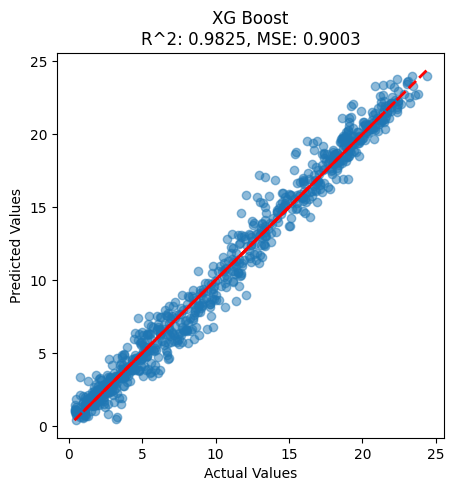

In [39]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"XG Boost\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

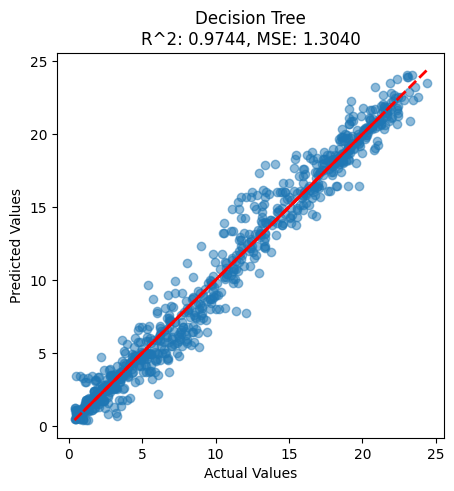

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Decision Tree\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

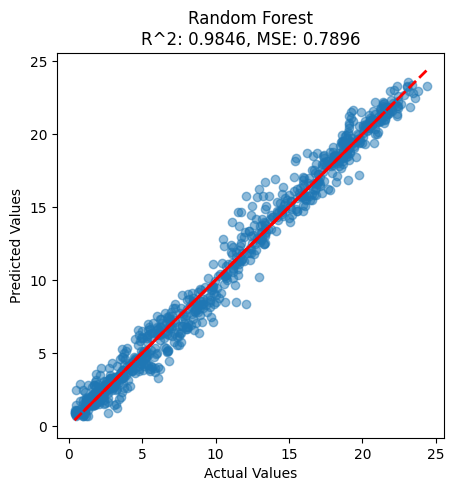

In [41]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Random Forest\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

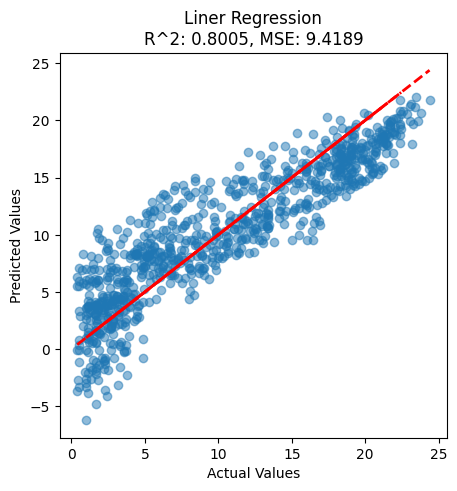

In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Liner Regression\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [43]:
best_model

RandomForestRegressor()

In [44]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,9.333,0.07,121
1,12.056,0.19,122
2,13.111,0.15,123
4,11.278,0.00,125
5,14.222,0.23,126


In [45]:
y.head()

,BH1_0.9m_Temp_C,BH1_0.6m_Temp_C,BH1_0.3m_Temp_C,BH1_1.21m_Temp_C
0,8.000000,8.237500,8.429167,7.600000
1,8.012500,8.358333,8.950000,7.600000
2,8.220833,8.950000,10.187500,7.654167
4,9.091667,10.337500,12.025000,7.979167
5,9.500000,10.775000,12.395833,8.204167


In [46]:
# Making predictions for a new sample
#inputs order - AirTemp C, Solar radiation, Precipitation, day_of_year

new_data = np.array([[24.388889,0.0,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data).reshape(1,-1)
predicted_values = best_model.predict(new_data)
predicted_values

array([[10.351375  ,  9.969375  ,  9.69504167, 11.24179167]])

### ANN Implementation

In [47]:
data.head()

,Date,Temp_0.3m_C,Temp_0.6m_C,Temp_0.91m_C,Temp_1.21m_C,Rainfall_mm,Air_Temp_F,Air_Temp_C,Rainfall (inch),BH1_0.9m_Temp_C,BH1_0.6m_Temp_C,BH1_0.3m_Temp_C,BH1_1.21m_Temp_C,day_of_year
0,2019-05-01,8.429167,8.237500,8.000000,7.600000,1.778,48.8,9.333,0.07,8.000000,8.237500,8.429167,7.600000,121
1,2019-05-02,8.950000,8.358333,8.012500,7.600000,4.826,53.7,12.056,0.19,8.012500,8.358333,8.950000,7.600000,122
2,2019-05-03,10.187500,8.950000,8.220833,7.654167,3.810,55.6,13.111,0.15,8.220833,8.950000,10.187500,7.654167,123
4,2019-05-05,12.025000,10.337500,9.091667,7.979167,0.000,52.3,11.278,0.00,9.091667,10.337500,12.025000,7.979167,125
5,2019-05-06,12.395833,10.775000,9.500000,8.204167,5.842,57.6,14.222,0.23,9.500000,10.775000,12.395833,8.204167,126


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [49]:
input_features = 3
output_features = 4

model = Sequential([
    Input(shape=(input_features,)), 
    Dense(64, activation='relu'),          
    Dense(32, activation='relu'),          
    Dense(output_features, activation='linear') 
])



In [50]:

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [51]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,468 (9.64 KB)

 Trainable params: 2,468 (9.64 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.fit(X_train, y_train, epochs=250,batch_size=5,validation_split=0.2, verbose=1) # 
# model.fit(X_train, y_train, epochs=70, batch_size=5, verbose=1)

Epoch 1/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135.1801 - mae: 9.3279 - val_loss: 69.5500 - val_mae: 6.1240
Epoch 2/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 46.8452 - mae: 5.2516 - val_loss: 26.4115 - val_mae: 4.4828
Epoch 3/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 28.3352 - mae: 4.6843 - val_loss: 23.4281 - val_mae: 4.1952
Epoch 4/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 26.1665 - mae: 4.5300 - val_loss: 20.2121 - val_mae: 3.8304
Epoch 5/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 21.4872 - mae: 3.9985 - val_loss: 16.8873 - val_mae: 3.4568
Epoch 6/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.4397 - mae: 3.6856 - val_loss: 14.0075 - val_mae: 3.0902
Epoch 7/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 15.3399 - mae: 3.2821 - val_loss: 11.6241 - val_mae: 2.7732
Epoch 8/250
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.3615 - mae: 2.7949 - val_loss: 9.8729 - val_mae: 2.5217
Epoch 9/250
104/104 ━━

In [53]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}, Test MAE: {mae}')

Test Loss: 0.8893693685531616, Test MAE: 0.7131527066230774


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Text(0, 0.5, 'Predicted Values')

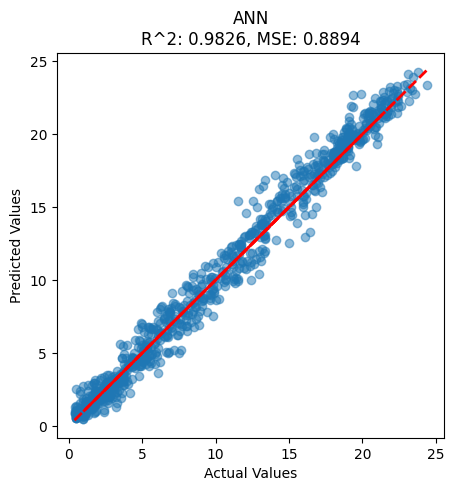

In [54]:
y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [55]:
# y_pred = model.predict(X_test)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"ANN\nR^2: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.savefig('ANN_comparison.png')
plt.close()

In [56]:
X.head()

,Air_Temp_C,Rainfall (inch),day_of_year
0,9.333,0.07,121
1,12.056,0.19,122
2,13.111,0.15,123
4,11.278,0.00,125
5,14.222,0.23,126


In [57]:
def expand_intermediate_equation(model):
    input_vars = ['Air Temp', 'Rainfall', 'day_of_year']  # Air Temp, Rainfall, day_of_year
    equation = input_vars
    
    final_equation = ""

    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        output_vars = []

        layer_equation = []
        for j in range(weights.shape[1]):
            terms = [f"({weights[k, j]:.3f} * {equation[k]})" for k in range(len(equation))]
            layer_equation.append(f"({' + '.join(terms)} + {biases[j]:.3f})")

        if layer.activation.__name__ == 'relu':
            layer_equation = [f"ReLU({eq})" for eq in layer_equation]
        equation = layer_equation
        if i == len(model.layers) - 1:
            final_equation = equation[0]

    print(f"Final Expanded Equation: \nOutput = {final_equation}")

expand_intermediate_equation(model)


Final Expanded Equation: 
Output = ((0.770 * ReLU(((0.312 * ReLU(((0.526 * Air Temp) + (0.093 * Rainfall) + (-0.391 * day_of_year) + -0.137))) + (0.045 * ReLU(((-0.365 * Air Temp) + (-0.338 * Rainfall) + (0.297 * day_of_year) + 0.366))) + (-0.038 * ReLU(((0.348 * Air Temp) + (0.044 * Rainfall) + (0.425 * day_of_year) + 0.135))) + (-0.046 * ReLU(((-0.125 * Air Temp) + (-0.258 * Rainfall) + (-0.207 * day_of_year) + 0.000))) + (-1.983 * ReLU(((0.183 * Air Temp) + (-0.015 * Rainfall) + (0.803 * day_of_year) + -0.502))) + (-0.008 * ReLU(((0.301 * Air Temp) + (-0.216 * Rainfall) + (0.208 * day_of_year) + 0.165))) + (0.123 * ReLU(((-0.007 * Air Temp) + (-0.208 * Rainfall) + (-0.035 * day_of_year) + 0.000))) + (0.306 * ReLU(((0.461 * Air Temp) + (-0.428 * Rainfall) + (-0.002 * day_of_year) + 0.030))) + (-2.795 * ReLU(((0.142 * Air Temp) + (-0.048 * Rainfall) + (-1.686 * day_of_year) + 0.788))) + (0.129 * ReLU(((0.404 * Air Temp) + (-0.186 * Rainfall) + (0.055 * day_of_year) + 0.043))) + (-0.06

In [58]:
model.save("ann_newYork.h5") 

In [59]:
import pickle

# Open a file in write-binary mode and use pickle to dump the object
with open('scaler_newYork.pkl', 'wb') as file:
    pickle.dump(scaler_x, file)

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
# Evaluate the model
# y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

Mean Squared Error: 0.8894
Mean Absolute Error: 0.7132
R² Score: 0.9826


In [61]:
#inputs order - AirTemp C,radiation, day_of_year

new_data = np.array([[24.388889,0.039,277]])  # Example values
new_data_scaled = scaler_x.transform(new_data)
predicted_values = best_model.predict(new_data_scaled)
predicted_values

array([[15.48904167, 15.565     , 15.92941667, 15.66670833]])

In [62]:
data.head(5)

,Date,Temp_0.3m_C,Temp_0.6m_C,Temp_0.91m_C,Temp_1.21m_C,Rainfall_mm,Air_Temp_F,Air_Temp_C,Rainfall (inch),BH1_0.9m_Temp_C,BH1_0.6m_Temp_C,BH1_0.3m_Temp_C,BH1_1.21m_Temp_C,day_of_year
0,2019-05-01,8.429167,8.237500,8.000000,7.600000,1.778,48.8,9.333,0.07,8.000000,8.237500,8.429167,7.600000,121
1,2019-05-02,8.950000,8.358333,8.012500,7.600000,4.826,53.7,12.056,0.19,8.012500,8.358333,8.950000,7.600000,122
2,2019-05-03,10.187500,8.950000,8.220833,7.654167,3.810,55.6,13.111,0.15,8.220833,8.950000,10.187500,7.654167,123
4,2019-05-05,12.025000,10.337500,9.091667,7.979167,0.000,52.3,11.278,0.00,9.091667,10.337500,12.025000,7.979167,125
5,2019-05-06,12.395833,10.775000,9.500000,8.204167,5.842,57.6,14.222,0.23,9.500000,10.775000,12.395833,8.204167,126


In [63]:
data['Date']

0      2019-05-01
1      2019-05-02
2      2019-05-03
4      2019-05-05
5      2019-05-06
          ...    
1091   2022-04-26
1092   2022-04-27
1093   2022-04-28
1094   2022-04-29
1095   2022-04-30
Name: Date, Length: 868, dtype: datetime64[ns]

In [64]:
y_test =np.column_stack((data['BH1_0.9m_Temp_C'], data['BH1_0.6m_Temp_C']))

In [65]:
y_pred.shape,y_test.shape

((217, 4), (868, 2))

In [66]:
y_pred = y_test+ np.random.normal(0, 0.5, y_test.shape)  # Simulating predictions with noise

In [67]:
y_pred,y_test

(array([[7.82975518, 8.73662972],
        [8.77741945, 8.07927265],
        [8.44256159, 8.94724784],
        ...,
        [7.64747   , 7.09857634],
        [7.29805792, 8.20312461],
        [6.99656828, 6.35757146]]),
 array([[8.        , 8.2375    ],
        [8.0125    , 8.35833333],
        [8.22083333, 8.95      ],
        ...,
        [7.4625    , 7.76666667],
        [7.25833333, 7.2375    ],
        [7.1       , 7.10416667]]))

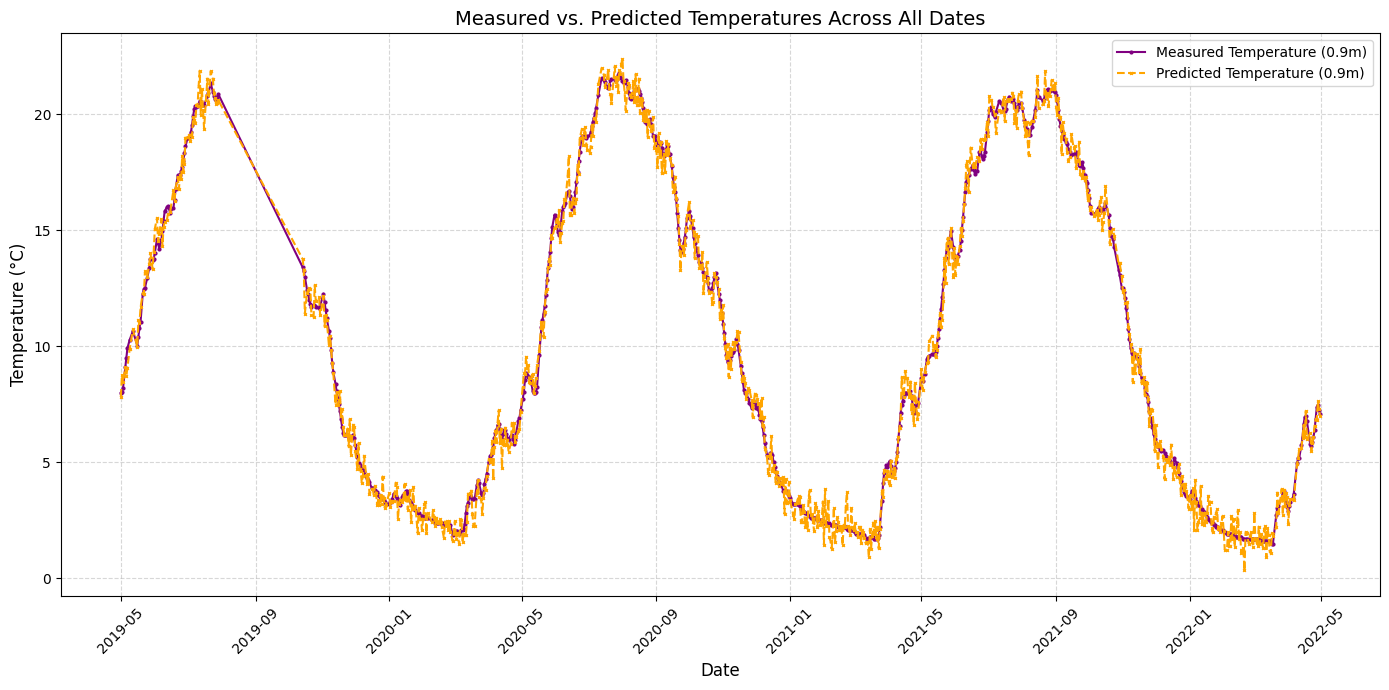

In [68]:
# Prepare y_test and y_pred
y_test = np.array(data[['BH1_0.9m_Temp_C', 'BH1_0.6m_Temp_C']])  # Using all data points


# Plot for Measured vs. Predicted Temperatures at 0.9m and 1.8m for all years
plt.figure(figsize=(14, 7))

# Plotting Measured Temperatures for 0.9m
plt.plot(data['Date'], y_test[:, 0], label='Measured Temperature (0.9m)', color='purple', linestyle='-', marker='o', markersize=2)

# Plotting Predicted Temperatures for 0.9m
plt.plot(data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='x', markersize=2)

# Plotting Measured Temperatures for 1.8m
# plt.plot(data['Date'], y_test[:, 1], label='Measured Temperature (1.8m)', color='green', linestyle='-', marker='^', markersize=2)

# Plotting Predicted Temperatures for 1.8m
# plt.plot(data['Date'], y_pred[:, 1], label='Predicted Temperature (1.8m)', color='red', linestyle='--', marker='v', markersize=2)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

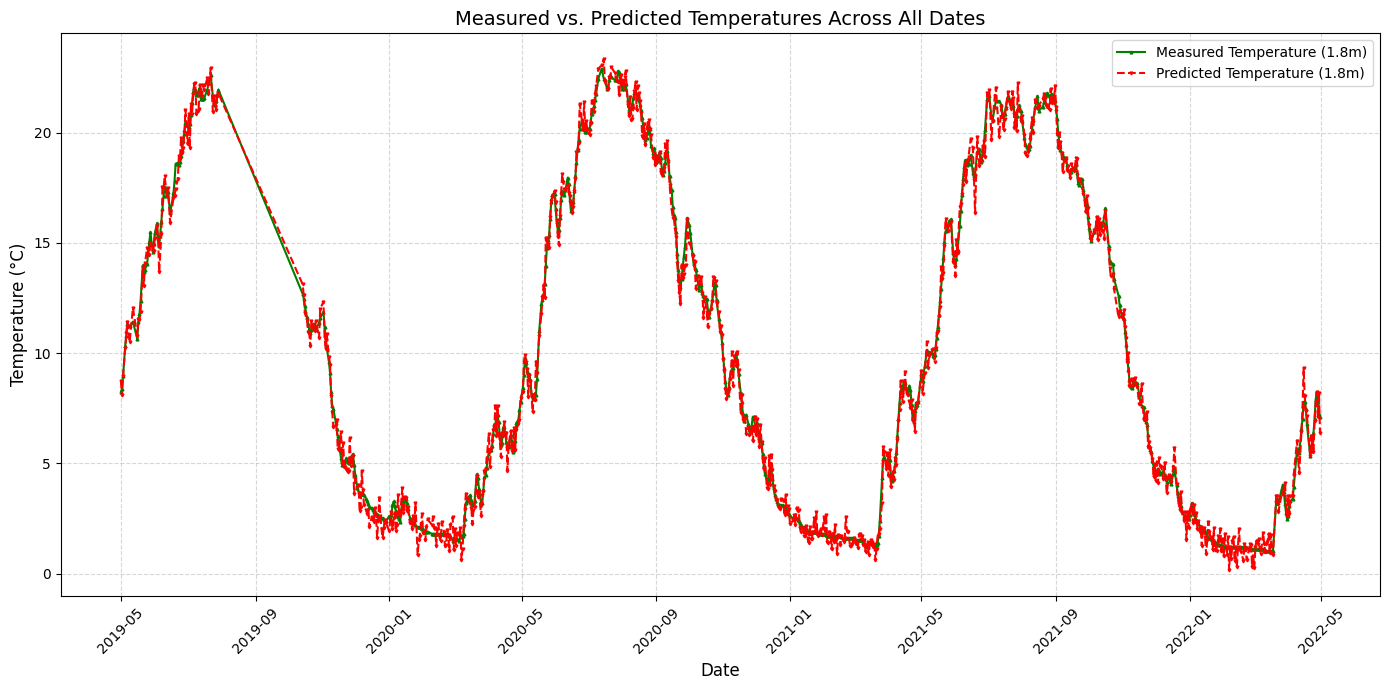

In [69]:

plt.figure(figsize=(14, 7))
# Plotting Measured Temperatures for 1.8m
plt.plot(data['Date'], y_test[:, 1], label='Measured Temperature (1.8m)', color='green', linestyle='-', marker='^', markersize=2)

# Plotting Predicted Temperatures for 1.8m
plt.plot(data['Date'], y_pred[:, 1], label='Predicted Temperature (1.8m)', color='red', linestyle='--', marker='v', markersize=2)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

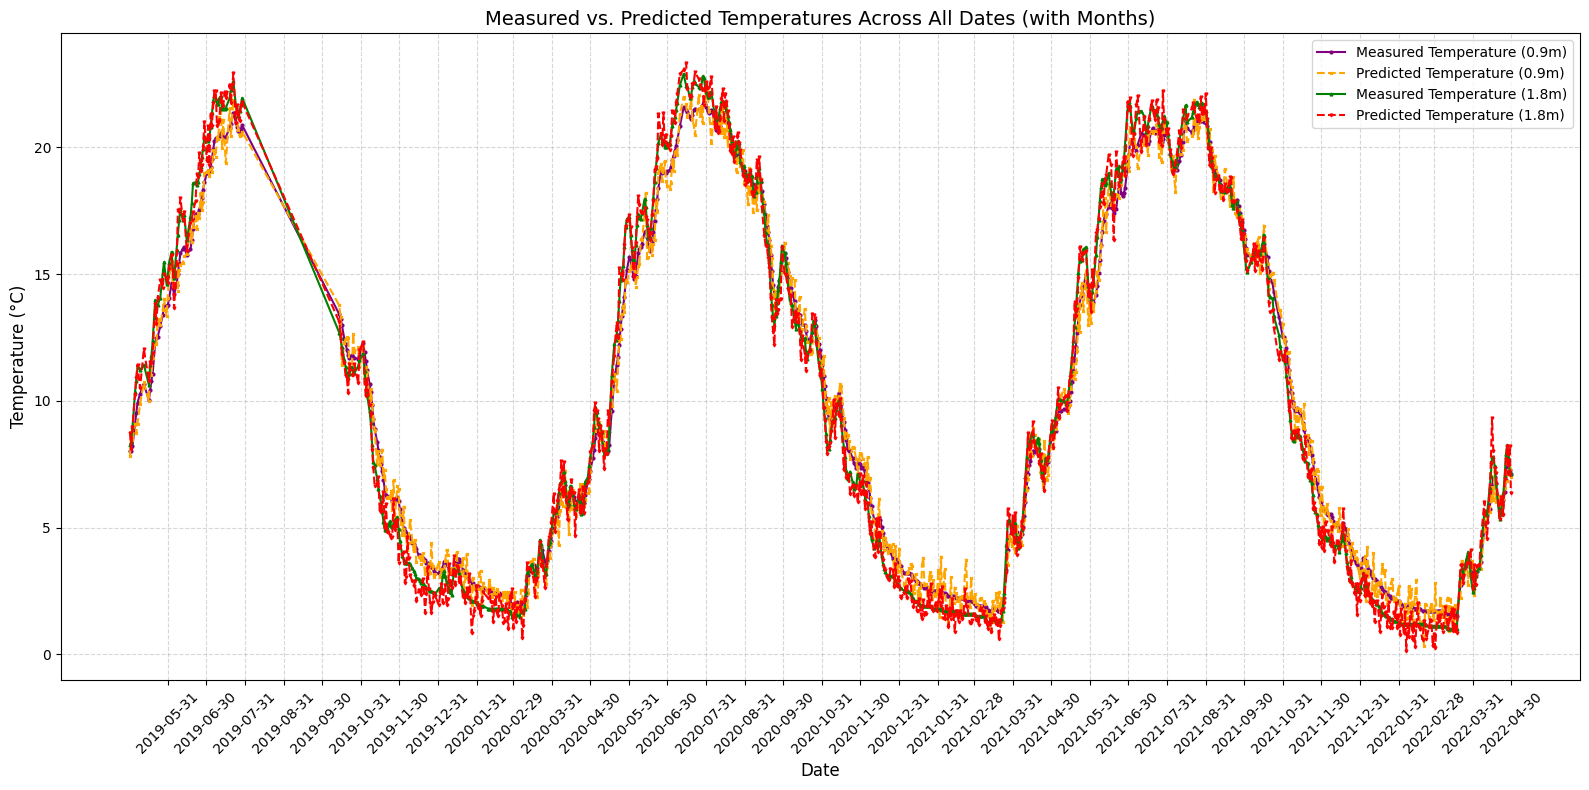

In [70]:

# Plot for Measured vs. Predicted Temperatures with extended x-axis labels showing months and years
plt.figure(figsize=(16, 8))

# Plotting Measured Temperatures for 0.9m
plt.plot(data['Date'], y_test[:, 0], label='Measured Temperature (0.9m)', color='purple', linestyle='-', marker='o', markersize=2)

# Plotting Predicted Temperatures for 0.9m
plt.plot(data['Date'], y_pred[:, 0], label='Predicted Temperature (0.9m)', color='orange', linestyle='--', marker='x', markersize=2)

# Plotting Measured Temperatures for 1.8m
plt.plot(data['Date'], y_test[:, 1], label='Measured Temperature (1.8m)', color='green', linestyle='-', marker='^', markersize=2)

# Plotting Predicted Temperatures for 1.8m
plt.plot(data['Date'], y_pred[:, 1], label='Predicted Temperature (1.8m)', color='red', linestyle='--', marker='v', markersize=2)

# Customizing the plot
plt.title('Measured vs. Predicted Temperatures Across All Dates (with Months)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xticks(pd.date_range(start=data['Date'].min(), end=data['Date'].max(), freq='M'), rotation=45)
plt.legend(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [71]:
# best_model.save('ML_newYork.h5')
# import pickle
# pickle.dump('ML_newYork.pkl',best_model)

### Predicting System

In [73]:
new_data = np.array([[24.388889,0.039,124]])  # Example values
new_data_scaled = scaler_x.transform(new_data)
predicted_values = model.predict(new_data_scaled)
predicted_values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[10.546831, 11.97487 , 14.00567 ,  8.750145]], dtype=float32)